In [1]:
 from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(150, 150, 3))

/root/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 68s 1us/step


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [35]:
import os
import shutil

# 元のデータセットを展開したディレクトリへのパス
## ベースパス
BASE_PATH = os.path.dirname(os.path.abspath(__name__))
## 絶対パスと相対パスをくっつける
source_joined_path = os.path.join(BASE_PATH, './dataset/dogs-vs-cats')
##正規化して絶対パスにする
data_source_path = os.path.normpath(source_joined_path)
# 訓練データセットが入っている
train_data_source_path = os.path.join(data_source_path, 'train')

# より小さなデータセットを格納するディレクトリを作る
dataset_path = os.path.join(BASE_PATH, './dataset/dog_cat_data')
data_target_dir = os.path.normpath(dataset_path)
try:
    os.mkdir(data_target_dir)
except FileExistsError:
    print("すでに小さなデータセットを格納するディレクトリは存在しています")

# 訓練データセット、検証データセット、テストデータセットを配置するディレクトリ 
train_dir = os.path.join(data_target_dir, 'train')
try:
    os.mkdir(train_dir)
except FileExistsError:
    print("訓練データセットを入れるディレクトリは存在しています")
    
validation_dir = os.path.join(data_target_dir, 'validation') 
try:
    os.mkdir(validation_dir)
except FileExistsError:
    print("検証データセットを入れるディレクトリは存在しています")

test_dir = os.path.join(data_target_dir, 'test')
try:
    os.mkdir(test_dir)
except FileExistsError:
    print("テストデータセットを入れるディレクトリは存在しています")

In [36]:
# 訓練用の猫の画像を配置するディレクトリ 
train_cats_dir = os.path.join(train_dir, 'cats') 
try:
    os.mkdir(train_cats_dir) 
except FileExistsError:
    print("訓練用の猫データのディレクトリは存在しています")

# 訓練用の犬の画像を配置するディレクトリ 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
try:
    os.mkdir(train_dogs_dir) 
except FileExistsError:
    print("訓練用の犬データのディレクトリは存在しています")

# 検証用の猫の画像を配置するディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats') 
try:
    os.mkdir(validation_cats_dir)
except FileExistsError:
    print("検証用の猫データのディレクトリは存在しています")

# 検証用の犬の画像を配置するディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
    os.mkdir(validation_dogs_dir)
except FileExistsError:
    print("検証用の犬データのディレクトリは存在しています")

# テスト用の猫の画像を配置するディレクトリ 
test_cats_dir = os.path.join(test_dir, 'cats')
try:
    os.mkdir(test_cats_dir)
except FileExistsError:
    print("テスト用の猫データのディレクトリは存在しています")

# テスト用の犬の画像を配置するディレクトリ 
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
    os.mkdir(test_dogs_dir)
except FileExistsError:
    print("テスト用の犬データのディレクトリは存在しています")

In [37]:
# 最初の1,000個の猫画像をtrain_cats_dirにコピー
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames: 
    src = os.path.join(train_data_source_path, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 次の500個の猫画像をvalidation_cats_dirにコピー
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames: 
    src = os.path.join(train_data_source_path, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 次の500個の猫画像をtest_cats_dirにコピー
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames: 
    src = os.path.join(train_data_source_path, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 最初の1,000個の犬画像をtrain_dogs_dirにコピー
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: 
    src = os.path.join(train_data_source_path, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 次の500個の犬画像をvalidation_dogs_dirにコピー
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: 
    src = os.path.join(train_data_source_path, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 次の500個の犬画像をtest_dogs_dirにコピー
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: 
    src = os.path.join(train_data_source_path, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [38]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [39]:
from keras.preprocessing.image import ImageDataGenerator


In [41]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 昨日作ったちいさなデータセット
BASE_DIR = os.path.dirname(os.path.abspath(__name__))
source_joined_dir = os.path.join(BASE_DIR, './dataset/dog_cat_data')
data_source_dir = os.path.normpath(source_joined_dir)

train_dir = os.path.join(data_source_dir, 'train')
validation_dir = os.path.join(data_source_dir, 'validation')
test_dir = os.path.join(data_source_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        # ジェネレータはデータを無限に生成するため、画像をひととおり処理したらbreakしなければならない
            break
      
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
 train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [43]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                             loss='binary_crossentropy',
                             metrics=['acc'])

history = model.fit(train_features, train_labels,
                                   epochs=30,
                                   batch_size=20,
                                   validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.6000 - acc: 0.6815 - val_loss: 0.4336 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4216 - acc: 0.8065 - val_loss: 0.3611 - val_acc: 0.8690
Epoch 3/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.3612 - acc: 0.8400 - val_loss: 0.3232 - val_acc: 0.8710
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3134 - acc: 0.8755 - val_loss: 0.2991 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2795 - acc: 0.8895 - val_loss: 0.2866 - val_acc: 0.8790
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2610 - acc: 0.8990 - val_loss: 0.2870 - v

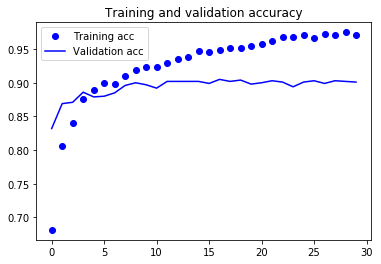

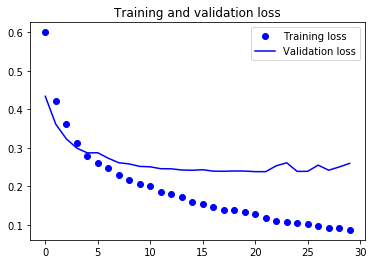

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# 正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# 損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
# EXERCISE: base_modelという名前でVGG16をインスタンス化しましょう　===============
from keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(150, 150, 3))
#==============================================================

base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [46]:
# EXERCISE: base_modelという名前でVGG16をインスタンス化しましょう　===============
from keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(150, 150, 3))
#==============================================================

base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [47]:
# 一旦全部解凍する
base_model.trainable = True

# EXERCISE:  最後の４層以外を凍結 ===========================
for layer in base_model.layers[:-4]:
    layer.trainable = False
#==================================================

In [48]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
                                                    rescale=1./255,
                                                    rotation_range=40,
                                                    width_shift_range=0.2,
                                                    height_shift_range=0.2,
                                                    shear_range=0.2,
                                                    zoom_range=0.2,
                                                    horizontal_flip=True,
                                                    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')


model.compile(loss='binary_crossentropy',
                         optimizer=optimizers.RMSprop(lr=1e-5),
                         metrics=['acc'])

history = model.fit_generator(train_generator,
                                                     steps_per_epoch=100,
#                                                      epochs=100,
                                                     epochs=1,
                                                     validation_data=validation_generator,
                                                     validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/1
100/100 [==============================] - 1121s 11s/step - loss: 0.4360 - acc: 0.8035 - val_loss: 0.2888 - val_acc: 0.8770


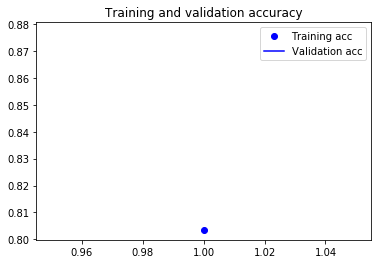

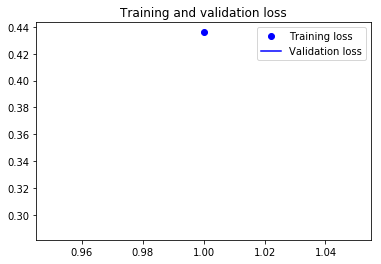

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure()

# 損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 

plt.show() 

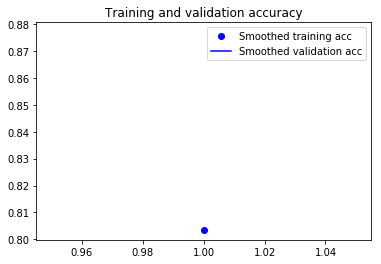

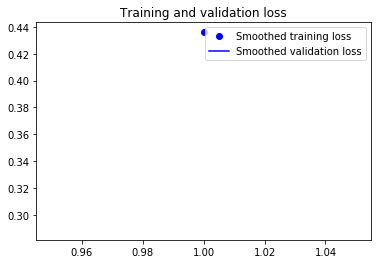

In [52]:
# プロットのスムージング
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
# テストデータで評価
test_generator = test_datagen.flow_from_directory(
                                                                test_dir,
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.877999997138977
